# Offensive Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sdf=pd.read_csv('Shots_Cleaned.csv')

In [3]:
## Dataframe with Detroit Red Wings Shots 
Wings_shots1=sdf[sdf['Team_Name']=='Detroit Red Wings']

##### Breakdown of Event Type 

In [4]:
event=Wings_shots1.value_counts(Wings_shots1['Event'])
event

Event
Shot            930
Blocked Shot    550
Missed Shot     387
Goal            111
dtype: int64

#####  Percentage Shots Made 

In [5]:
SOG=round((event['Goal']/(event['Shot']+event['Goal']))*100,1)
print('Percentage of shots on goal made:',SOG,'%')

Percentage of shots on goal made: 10.7 %


##### Average Amount Shots Taken per Game 

In [47]:
avg_s=round((event['Goal']+event['Shot'])/len(Wings_shots_game['Game_Id'].unique()),)
print('Average # of Shots by Red Wings per game:',avg_s)

Average # of Shots by Red Wings per game: 30


##### Breakdown of Shootout Goals 

In [43]:
## How many shootouts 
Shootout=Wings_shots1[Wings_shots1['Rink_Side']=='SO']
print('Number of Shootout Shots:',len(Shootout.index))

Number of Shootout Shots: 9


In [7]:
wings_so=Wings_shots1[Wings_shots1['Rink_Side']=='SO']
wings_so.value_counts(wings_so['Event'])

Event
Shot           4
Missed Shot    3
Goal           2
dtype: int64

##### Breakdown of Types of Shots and Goals by Amount and Percentage 

In [8]:
## Filter out shootout  
Wings_shots_game=Wings_shots1[Wings_shots1['Rink_Side']!='SO']

In [9]:
counts=Wings_shots_game[['Event','Shot_Type']].value_counts(sort=False).reset_index()
counts.rename(columns = {0:'Value'}, inplace = True)
counts['%_Event_Type'] = 100 * counts['Value'] / counts.groupby('Event')['Value'].transform('sum')
counts

,Event,Shot_Type,Value,%_Event_Type
0,Goal,Backhand,3,2.752294
1,Goal,Deflected,4,3.669725
2,Goal,Poke,2,1.834862
3,Goal,Slap Shot,15,13.761468
4,Goal,Snap Shot,25,22.935780
5,Goal,Tip In,12,11.009174
6,Goal,Wrap around,3,2.752294
7,Goal,Wrist Shot,45,41.284404
8,Shot,Backhand,67,7.235421
9,Shot,Deflected,17,1.835853


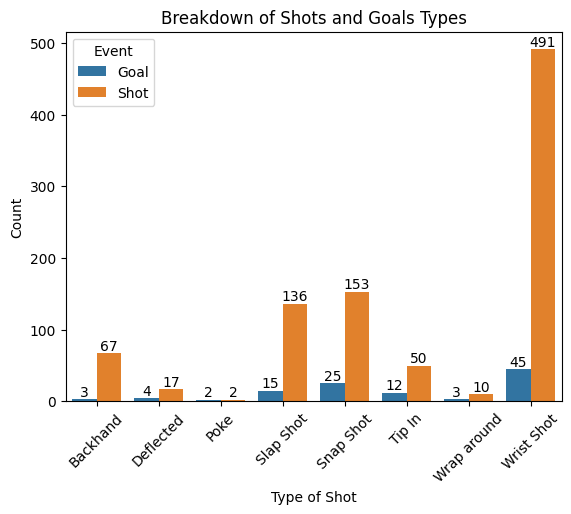

In [10]:
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 40em; }</style>"))

ax=sns.barplot(x = counts["Shot_Type"], y = counts["Value"], hue = "Event", data= counts)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Breakdown of Shots and Goals Types')
plt.xlabel("Type of Shot")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

The majority of shots and goals are wrist shots for the Red Wings in the 2022-2023 season so far. Snap shots, slap shots, and backhands are the next top type of shots taken. While snap shots, slap shots, and tip-ins are nest highest type of goal made. 

##### Red Wings Goal Strength 

In [11]:
goal_strength=Wings_shots_game[['Strength']].value_counts(sort=False).reset_index()
goal_strength.rename(columns = {0:'Value'}, inplace = True)
goal_strength

,Strength,Value
0,EVEN,81
1,PPG,26
2,SHG,2


Text(0.5, 1.0, 'Percentage of Strength: Goals')

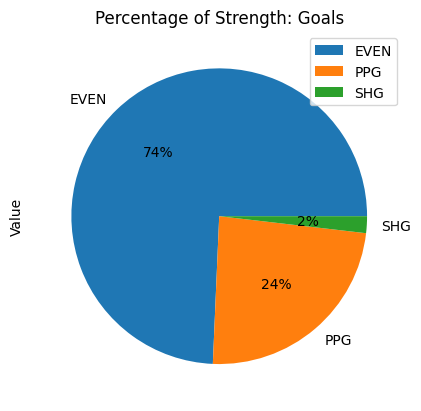

In [12]:
goal_strength.groupby(['Strength']).sum().plot(
    kind='pie', y='Value', autopct='%1.0f%%')
plt.title('Percentage of Strength: Goals')

Most goals are made when both teams are at even strength. Power play goals (PPG), when scoring team has advantage in numbers, is around 24%. Short handed goals (SHG), when scoring team has a distandage in numbers, is extremly low at 2% as would be predicted due to the disadvantage.  

##### Heatmap Comparing Red Wings Shots vs. Goal Coordinates 

In [13]:
## Flipping Coordinates of shots 
filtered_coordinates=Wings_shots_game

In [20]:
rink=filtered_coordinates['Rink_Side']=='Left'
filtered_coordinates.loc[rink, ['X']] = filtered_coordinates['X'] * -1
filtered_coordinates.loc[rink, ['Y']] = filtered_coordinates['Y'] * -1

In [21]:
shot_df=filtered_coordinates[filtered_coordinates['Event']=='Shot']
goal_df=filtered_coordinates[filtered_coordinates['Event']=='Goal']

Text(0.5, 1.0, 'Red Wings Goals Heatmap')

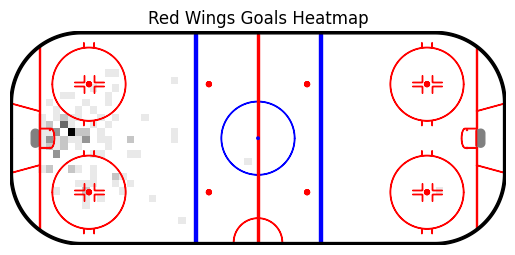

In [22]:
from hockey_rink import NHLRink
rink = NHLRink()
ax = rink.draw()
rink.heatmap(goal_df["X"],goal_df["Y"],binsize=3,cmap="Greys")
plt.title('Red Wings Goals Heatmap')

Text(0.5, 1.0, 'Red Wings Shots Heatmap')

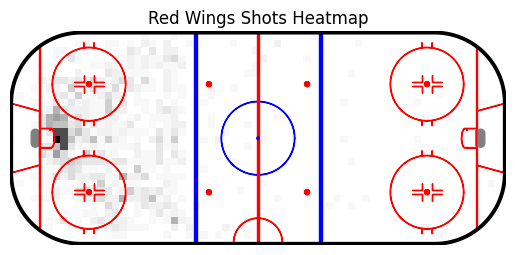

In [23]:
from hockey_rink import NHLRink
rink = NHLRink()
ax = rink.draw()
rink.heatmap(shot_df["X"],shot_df["Y"],binsize=3,cmap="Greys")
plt.title('Red Wings Shots Heatmap')

# Defensive Analysis

##### Breakdown of Event Type 

In [44]:
opponents_shots=sdf[sdf['Team_Name']!='Detroit Red Wings']
eventa=opponents_shots.value_counts(opponents_shots['Event'])
eventa

Event
Shot            998
Blocked Shot    465
Missed Shot     426
Goal            118
dtype: int64

##### Red Wings Goalies Save Percentage 

In [45]:
SP=round((eventa['Shot']/(eventa['Shot']+eventa['Goal']))*100,1)
print('Save Percentage:',SP,'%')

Save Percentage: 89.4 %


##### Average Shots Aganist per Game 

In [48]:
avg_a=round((eventa['Goal']+eventa['Shot'])/len(opponents_shots['Game_Id'].unique()),)
print('Average # of Shots Aganist Red Wings per game:',avg_a)

Average # of Shots Aganist Red Wings per game: 32


##### Breakdown of Types of Shots and Goals by Amount and Percentage 

In [25]:
counts1=opponents_shots[['Event','Shot_Type']].value_counts(sort=False).reset_index()
counts1.rename(columns = {0:'Value'}, inplace = True)
counts1['%_Event_Type'] = 100 * counts1['Value'] / counts1.groupby('Event')['Value'].transform('sum')
counts1

,Event,Shot_Type,Value,%_Event_Type
0,Goal,Backhand,9,7.627119
1,Goal,Deflected,3,2.542373
2,Goal,Poke,2,1.694915
3,Goal,Slap Shot,9,7.627119
4,Goal,Snap Shot,27,22.881356
5,Goal,Tip In,5,4.237288
6,Goal,Wrap around,1,0.847458
7,Goal,Wrist Shot,62,52.542373
8,Shot,Backhand,81,8.116232
9,Shot,Batted,2,0.200401


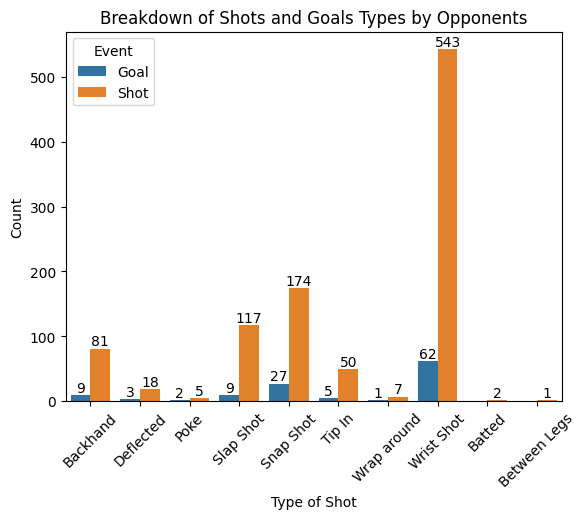

In [26]:
import seaborn as sns
ax=sns.barplot(x = counts1["Shot_Type"], y = counts1["Value"], hue = "Event", data= counts1)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Breakdown of Shots and Goals Types by Opponents')
plt.xlabel("Type of Shot")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

Wrist shot is still the most common type of shot taken and goal made by other teams. Most common  types of shots for other teams matches the most popular types of shots taken by Red Wings. 

##### Opponent Goal Strength 

In [27]:
strength_aganist=opponents_shots[['Strength']].value_counts(sort=False).reset_index()
strength_aganist.rename(columns = {0:'Value'}, inplace = True)
strength_aganist

,Strength,Value
0,EVEN,88
1,PPG,24
2,SHG,6


Text(0.5, 1.0, 'Percentage of Strength: Goals Aganist')

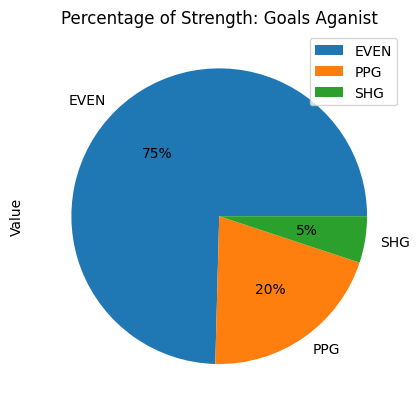

In [28]:
strength_aganist.groupby(['Strength']).sum().plot(
    kind='pie', y='Value', autopct='%1.0f%%')
plt.title('Percentage of Strength: Goals Aganist')

Percentages and amounts of goals made depending on team stregnth for team opposing team are very close to the Red Wings breakdown above. 

#####  Heatmap Comparing Opposing Team Shots vs. Goal Coordinates 

In [29]:
filtered_aganist=opponents_shots
rinka=filtered_aganist['Rink_Side']=='Right'
filtered_aganist.loc[rinka, ['X']] = filtered_aganist['X'] * -1
filtered_aganist.loc[rinka, ['Y']] = filtered_aganist['Y'] * -1

In [30]:
shot_dfa=filtered_aganist[filtered_aganist['Event']=='Shot']
goal_dfa=filtered_aganist[filtered_aganist['Event']=='Goal']

Text(0.5, 1.0, 'Goals on Red Wings')

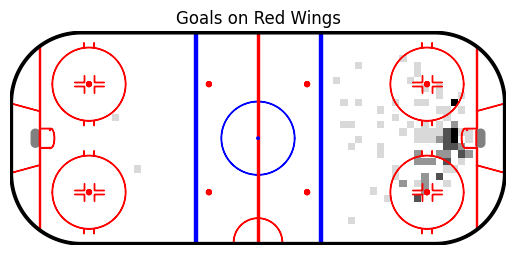

In [31]:
from hockey_rink import NHLRink
rink = NHLRink()
ax = rink.draw()
rink.heatmap(goal_dfa["X"],goal_dfa["Y"],binsize=3,cmap="Greys")
plt.title('Goals on Red Wings')

Text(0.5, 1.0, 'Shots Aganist Red Wings Heatmap')

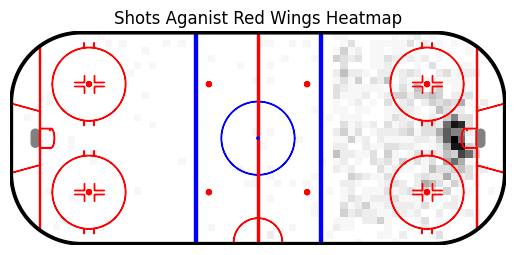

In [32]:
from hockey_rink import NHLRink
rink = NHLRink()
ax = rink.draw()
rink.heatmap(shot_dfa["X"],shot_dfa["Y"],binsize=3,cmap="Greys")
plt.title('Shots Aganist Red Wings Heatmap')